In [12]:
import os
from PlittGiocomo_CA1Morph_2019 import morph_analyses
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import suite2p as s2p
from suite2p_processing import s2p_preprocessing as s2p_pp
import h5py
import pickle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
pp = morph_analyses.preprocessing
u = morph_analyses.utilities

In [3]:
# load example 
df = pp.load_session_db(dir = "G:\\My Drive",scandir="Syt3KO")
# df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [4]:
mouse = '4343717.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanmat,s2pfolder
3605,4343717.2,16_03_2020,1,TwoTower_foraging,68,1,CA1,2020-03-16,G:\My Drive\VR_Data\TwoTower\4343717.2\16_03_2...,G:\My Drive\2P_Data\Syt3KO\4343717.2\16_03_202...,G:\My Drive\2P_Data\Syt3KO\4343717.2\16_03_202...
3639,4343717.2,18_03_2020,3,TwoTower_foraging,55,1,CA1,2020-03-18,G:\My Drive\VR_Data\TwoTower\4343717.2\18_03_2...,G:\My Drive\2P_Data\Syt3KO\4343717.2\18_03_202...,G:\My Drive\2P_Data\Syt3KO\4343717.2\18_03_202...
3673,4343717.2,20_03_2020,2,TwoTower_foraging,53,1,CA1,2020-03-20,G:\My Drive\VR_Data\TwoTower\4343717.2\20_03_2...,G:\My Drive\2P_Data\Syt3KO\4343717.2\20_03_202...,G:\My Drive\2P_Data\Syt3KO\4343717.2\20_03_202...
3707,4343717.2,22_03_2020,2,TwoTower_foraging,76,1,CA1,2020-03-22,G:\My Drive\VR_Data\TwoTower\4343717.2\22_03_2...,G:\My Drive\2P_Data\Syt3KO\4343717.2\22_03_202...,G:\My Drive\2P_Data\Syt3KO\4343717.2\22_03_202...


MouseName                                                4343717.2
DateFolder                                              20_03_2020
SessionNumber                                                    2
Track                                            TwoTower_foraging
RewardCount                                                     53
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2020-03-20 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4343717.2\20_03_2...
scanmat          G:\My Drive\2P_Data\Syt3KO\4343717.2\20_03_202...
s2pfolder        G:\My Drive\2P_Data\Syt3KO\4343717.2\20_03_202...
Name: 3673, dtype: object


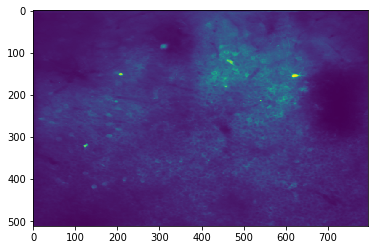

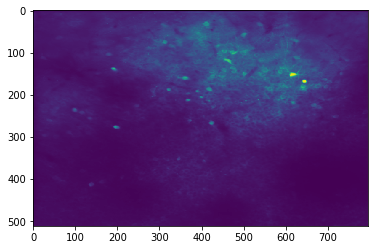

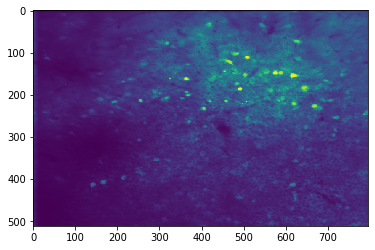

In [5]:
# load imaging data
for i in range(df_mouse.shape[0]):
    sess = df_mouse.iloc[i]
    try:
        ops = np.load(os.path.join(sess["s2pfolder"],"plane0","ops.npy"),allow_pickle=True).item()
        f,ax = plt.subplots()
        ax.imshow(ops['meanImg'])
    except:
        print(sess)

In [8]:

for i in range(df_mouse.shape[0]):
#     sess = df_mouse.iloc[i]
    df_mouse.iloc[i].scanmat = os.path.join("D:\\","4343717.2",df_mouse.iloc[i].DateFolder,os.path.split(df_mouse.iloc[i].scanmat)[1])
    df_mouse.iloc[i]["data file"] = os.path.join("D:\\","4343717.2",df_mouse.iloc[i].DateFolder,os.path.split(df_mouse.iloc[i]['data file'])[1])
df_mouse

C:\Users\markp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanmat,s2pfolder
3605,4343717.2,16_03_2020,1,TwoTower_foraging,68,1,CA1,2020-03-16,G:\My Drive\VR_Data\TwoTower\4343717.2\16_03_2...,G:\My Drive\2P_Data\Syt3KO\4343717.2\16_03_202...,G:\My Drive\2P_Data\Syt3KO\4343717.2\16_03_202...
3639,4343717.2,18_03_2020,3,TwoTower_foraging,55,1,CA1,2020-03-18,G:\My Drive\VR_Data\TwoTower\4343717.2\18_03_2...,G:\My Drive\2P_Data\Syt3KO\4343717.2\18_03_202...,G:\My Drive\2P_Data\Syt3KO\4343717.2\18_03_202...
3673,4343717.2,20_03_2020,2,TwoTower_foraging,53,1,CA1,2020-03-20,G:\My Drive\VR_Data\TwoTower\4343717.2\20_03_2...,G:\My Drive\2P_Data\Syt3KO\4343717.2\20_03_202...,G:\My Drive\2P_Data\Syt3KO\4343717.2\20_03_202...
3707,4343717.2,22_03_2020,2,TwoTower_foraging,76,1,CA1,2020-03-22,G:\My Drive\VR_Data\TwoTower\4343717.2\22_03_2...,G:\My Drive\2P_Data\Syt3KO\4343717.2\22_03_202...,G:\My Drive\2P_Data\Syt3KO\4343717.2\22_03_202...


In [5]:
# open h5 file 

# for each file
totalframes = 0
for i in range(df_mouse.shape[0]):
    sess = df_mouse.iloc[i]
    sess.scanmat = os.path.join("D:\\","4343717.2",df_mouse.iloc[i].DateFolder,os.path.split(df_mouse.iloc[i].scanmat)[1])
    info = s2p_pp.loadmat(sess.scanmat)
    print(info['scanmode'])
    totalframes+=int(info['max_idx'])*info['nChan']

print(info['sz'][0],info['sz'][1])
h5fname = os.path.join("D:\\",mouse+"_combined.h5")
abs_k = 0
batch_size = 100
with h5py.File(h5fname,'w') as f:
    dset = f.create_dataset("data",(totalframes,info['sz'][0],info['sz'][1]))
    for i in range(df_mouse.shape[0]):
        win_scan_k = 0 
        sess = df_mouse.iloc[i]
        sess.scanmat = os.path.join("D:\\","4343717.2",df_mouse.iloc[i].DateFolder,os.path.split(df_mouse.iloc[i].scanmat)[1])
        info = s2p_pp.loadmat(sess.scanmat)
        abs_last_ind = abs_k+info['max_idx']
        while win_scan_k<info['max_idx']:
            print('k',win_scan_k)
            data = s2p_pp.sbxread(os.path.splitext(sess.scanmat)[0],win_scan_k,batch_size)
            data = np.transpose(data[:,:,:,:],axes=(0,3,2,1))
            for chan in range(info['nChan']):
                dset[abs_k*info['nChan']+chan:min((info['nChan']*(abs_k+batch_size)+chan,info['nChan']*abs_last_ind)):info['nChan'],:,:]=np.squeeze(data[chan,:,:,:])
            



            f.flush()
            win_scan_k = np.minimum(info['max_idx'],win_scan_k+batch_size)
            abs_k=np.minimum(abs_k+batch_size,abs_last_ind)

#    append interleaved frames to file

# run suite2p on concatenated h5 file


C:\Users\markp\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1
1
1
1
512 796
k 0
1630208 100
0
k 100
1630208 100
163020800
k 200
1630208 100
326041600
k 300
1630208 100
489062400
k 400
1630208 100
652083200
k 500
1630208 100
815104000
k 600
1630208 100
978124800
k 700
1630208 100
1141145600
k 800
1630208 100
1304166400
k 900
1630208 100
1467187200
k 1000
1630208 100
1630208000
k 1100
1630208 100
1793228800
k 1200
1630208 100
1956249600
k 1300
1630208 100
2119270400
k 1400
1630208 100
2282291200
k 1500
1630208 100
2445312000
k 1600
1630208 100
2608332800
k 1700
1630208 100
2771353600
k 1800
1630208 100
2934374400
k 1900
1630208 100
3097395200
k 2000
1630208 100
3260416000
k 2100
1630208 100
3423436800
k 2200
1630208 100
3586457600
k 2300
1630208 100
3749478400
k 2400
1630208 100
3912499200
k 2500
1630208 100
4075520000
k 2600
1630208 100
4238540800
k 2700
1630208 100
4401561600
k 2800
1630208 100
4564582400
k 2900
1630208 100
4727603200
k 3000
1630208 100
4890624000
k 3100
1630208 100
5053644800
k 3200
1630208 100
5216665600
k 3300
1630208 100
53

In [6]:
ops = s2p_pp.set_ops(d={'h5py':h5fname,'nchannels':2})

In [7]:
s2p.run_s2p.run_s2p(ops)

{}
h5
time 6757.95 sec. Wrote h5py to binaries for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
----------- REGISTRATION
registering 155802 frames
NOTE: estimated bidiphase offset from data: 0 pixels
Reference frame, 27.76 sec.
2500/155802 frames, 122.94 sec.
5000/155802 frames, 250.25 sec.
7500/155802 frames, 377.52 sec.
10000/155802 frames, 505.64 sec.
12500/155802 frames, 636.41 sec.
15000/155802 frames, 764.22 sec.
17500/155802 frames, 890.90 sec.
20000/155802 frames, 1021.55 sec.
22500/155802 frames, 1147.60 sec.
25000/155802 frames, 1277.46 sec.
27500/155802 frames, 1403.72 sec.
30000/155802 frames, 1533.91 sec.
32500/155802 frames, 1663.77 sec.
35000/155802 frames, 1792.52 sec.
37500/155802 frames, 1921.47 sec.
40000/155802 frames, 2048.95 sec.
42500/155802 frames, 2177.60 sec.
45000/155802 frames, 2304.57 sec.
47500/155802 frames, 2433.42 sec.
50000/155802 frames, 2560.62 sec.
52500/155802 frames, 2689.26 sec.
55000/155802 frames, 2819.63 sec.
57500/155802 fram

C:\Users\markp\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


After removing overlaps, 1776 ROIs remain
Masks made in 70.06 sec.
Extracted fluorescence from 1776 ROIs in 155802 frames, 2350.32 sec.
Extracted fluorescence from 1776 ROIs in 155802 frames, 2297.26 sec.
----------- Total 6887.37 sec.
----------- SPIKE DECONVOLUTION
----------- Total 973.39 sec.
Plane 0 processed in 19665.82 sec (can open in GUI).
total = 7933.57 sec.
TOTAL RUNTIME 7936.73 sec


array([{'look_one_level_down': False, 'fast_disk': 'D:\\suite2p\\plane0', 'delete_bin': False, 'mesoscan': False, 'bruker': False, 'h5py': 'D:\\4343717.2_combined.h5', 'h5py_key': 'data', 'save_path0': 'D:\\', 'save_folder': [], 'subfolders': [], 'nplanes': 1, 'nchannels': 2, 'functional_chan': 1, 'tau': 1.0, 'fs': 15.4609, 'force_sktiff': False, 'frames_include': -1, 'preclassify': 0, 'save_mat': False, 'combined': True, 'aspect': 1.0, 'do_bidiphase': True, 'bidiphase': 0, 'bidi_corrected': True, 'do_registration': 1, 'two_step_registration': False, 'keep_movie_raw': False, 'nimg_init': 300, 'batch_size': 500, 'maxregshift': 0.1, 'align_by_chan': 1, 'reg_tif': False, 'reg_tif_chan2': False, 'subpixel': 10, 'smooth_sigma_time': 0, 'smooth_sigma': 1.15, 'th_badframes': 1.0, 'pad_fft': False, 'nonrigid': True, 'block_size': [128, 128], 'snr_thresh': 1.2, 'maxregshiftNR': 5, '1Preg': False, 'spatial_hp': 50, 'pre_smooth': 2, 'spatial_taper': 50, 'roidetect': True, 'spikedetect': True, 'sp

In [11]:
# load F, Fneu, spks, iscell
F = np.load(os.path.join("D:\\suite2p\\plane0\\","F.npy"))
Fneu = np.load(os.path.join("D:\\suite2p\\plane0\\","Fneu.npy"))
dff = u.dff(F-.7*Fneu)
S = np.load(os.path.join("D:\\suite2p\\plane0\\","spks.npy"))
iscell = np.load(os.path.join("D:\\suite2p\\plane0\\","iscell.npy"))




In [17]:
# for each session
firstind = 0
for i in range(df_mouse.shape[0]):
    sess = df_mouse.iloc[i]
    sess.scanmat = os.path.join("D:\\","4343717.2",df_mouse.iloc[i].DateFolder,os.path.split(df_mouse.iloc[i].scanmat)[1])
    info = s2p_pp.loadmat(sess.scanmat)

    
# load info 
    VRDat = pp.behavior_dataframe(os.path.join("D:","4343717.2",sess["DateFolder"],"TwoTower_foraging_%s.sqlite" % sess["SessionNumber"]),scanmats=sess['scanmat'],concat=False)
    _F = F[iscell[:,0]>0,firstind:firstind+info['max_idx']].T
    _Fneu = Fneu[iscell[:,0]>0,firstind:firstind+info['max_idx']].T
    _dff = dff[iscell[:,0]>0,firstind:firstind+info['max_idx']].T
    _S = S[iscell[:,0]>0,firstind:firstind+info['max_idx']].T
    firstind+=info['max_idx']
    
    with open(os.path.join("D:","4343717.2",sess["DateFolder"],"datadict.pkl"),'wb') as f:
        pickle.dump({"F":_F,"Fneu":Fneu,"DFF":_dff,"S":_S,"VRDat":VRDat},f)
        

    
                                  
                                  
# save up to max idx

num aberrant ttls 0.0
8.628852956038402 2011.3610409297626
8.667003537139971 2011.2622536634665
num aberrant ttls 0.0
8.623799898938858 2745.1816574027284
8.667003537139971 2745.1116725619004
num aberrant ttls 0.0
8.607756442647801 2278.7040171803937
8.667003537139971 2278.581101566448
num aberrant ttls 0.0
8.668393127842345 3042.0210965133906
8.73168266801415 3041.9242041435073
